<a href="https://colab.research.google.com/github/NIKHIL-SEKHAR/AI_ML_COURSE_ICTAK_NIKHIL/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


#Reading dataset

In [2]:
filepath = '/content/Mall_Customers.csv'
df_mall = pd.read_csv(filepath)
df_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


This is a labelled data but, to demonstrate unsupervised algorithm, we consider like an unlabelled data

In [3]:
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df_mall.Genre.unique()

array(['Male', 'Female'], dtype=object)

In [6]:
df_mall['Genre'] = df_mall['Genre'].map({'Male': 0, 'Female': 1})
df_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,NaN,19,15,39
1,2,NaN,21,15,81
2,3,NaN,20,16,6
3,4,NaN,23,16,77
4,5,NaN,31,17,40


In [7]:
df_mall.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,NaN,19,15,39
1,2,NaN,21,15,81


ML MODELLING

##Elbow method

we plot elbow curve to is=dentify
the ideal value of clusters (k).

In [16]:
X = df_mall[['Annual Income (k$)', 'Spending Score (1-100)']].values
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, n_init=20, random_state=42)
  kmeans.fit(X)
  # cluster sum of square for number of clusters = i
  css = kmeans.inertia_
  wcss.append(css)

In [17]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30241.34361793659,
 24995.96978113596,
 21850.16528258562,
 19779.01412122218]

Plotting the elbow curve

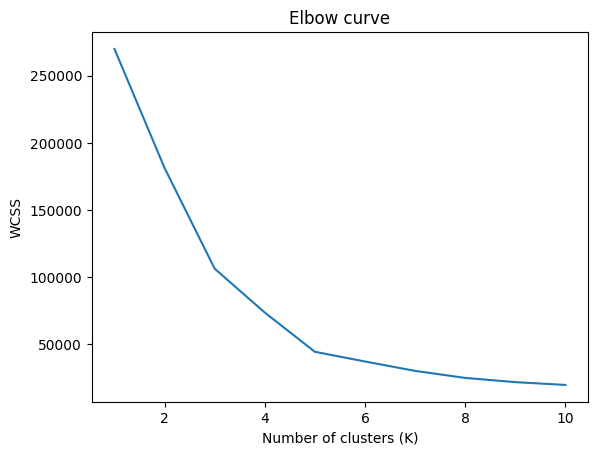

In [20]:
plt.plot(range(1, len(wcss) + 1), wcss)
plt.title("Elbow curve")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.show()

From the elbow plot, 6 seems to be the ideal number of clusters.

In [22]:
# finalizing k means algorithm with ideal number of clusters
kmeans_algo = KMeans(n_clusters=6, n_init=20, random_state=42)
kmeans_algo.fit(X)

# Cluster output.
cluster_labels = kmeans_algo.predict(X)
cluster_labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 5, 0, 5, 1, 5, 1, 5,
       0, 5, 1, 5, 1, 5, 1, 5, 1, 5, 0, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [23]:
df_mall['Cluser'] = cluster_labels
df_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluser
0,1,NaN,19,15,39,3
1,2,NaN,21,15,81,4
2,3,NaN,20,16,6,3
3,4,NaN,23,16,77,4
4,5,NaN,31,17,40,3


## plotting clusters

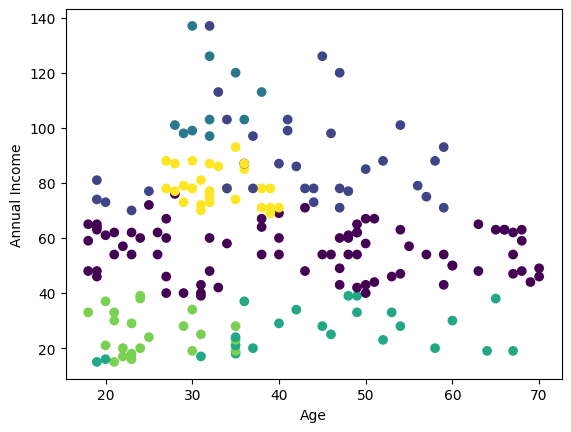

In [26]:
# plot an age v income plot with colour coded clusters
plt.scatter(df_mall['Age'], df_mall['Annual Income (k$)'], c=df_mall['Cluser'])

plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [27]:
# get all the rows which belong to cluster 0
cluster0 = df_mall[df_mall['Cluser'] == 0]
cluster0.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluser
43,44,NaN,31,39,61,0
46,47,NaN,50,40,55,0
47,48,NaN,27,40,47,0
48,49,NaN,29,40,42,0
49,50,NaN,31,40,42,0
